# Runge-Kutta Methods

The aforementioned Euler's method is the simplest single step ODE solving method, but has a fairly large error. The Runge-Kutta (RK) methods are more popular due to their improved accuracy, in particular 4th and 5th order methods.

## Outline of the Derivation

The idea behind Runge-Kutta is to perform integration steps using a weighted average of Euler-like steps. The following outline {cite}`nm-ode-rk-epperson-numerical-methods` is not a full derivation of the method, as this requires theorems outside the scope of this course.

## Second Order Runge-Kutta (RK2)

We shall start by looking at second order Runge-Kutta methods. We want to solve an ODE of the form

$$
\frac{dy}{dx} = f(x, y)
$$

on the interval $[x_i, x_{i+1}]$, where $x_{i+1} = x_i + h$, with a given initial condition $y(x = x_i) = y_i$. That is, we wish to determine the value of $y(x_{i+1}) = y_{i+1}$. We start by calculating the gradient of $y$ at 2 places:

- The start of the interval: $(x_i, y_i)$
- A point inside the interval, for which we approximate the $y$ value using Euler's method: $(x_i + \alpha h, y_i + \alpha h f(x_i, y_i))$, for some choice of $\alpha$.

<!--- Not necessarily inside the interval though... --->
We then approximate the value of $y_{i+1}$ using Euler's method with each of these gradients:

- $y_{i+1} \approx y_i + h f(x_i, y_i)$
- $y_{i+1} \approx y_i + h f(x_i + \alpha h, y_i + \alpha h f(x_i, y_i))$

The final approximation of $y_{i+1}$ is calculated by taking a weighted average of these two approximations:

$$
y_{i+1} \approx y_i + c_1 h f(x_i, y_i) + c_2 h f(x_i + \alpha h, y_i + \alpha h f(x_i, y_i) )
$$

where $c_1 + c_2 = 1$ is required.

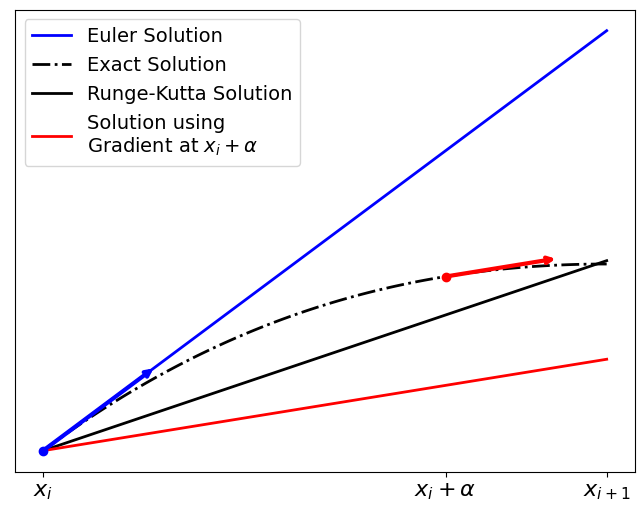

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arrow

##Functions
def fprime(a, x, y):
    return 3*a[0]*x*x + 2*a[1]*x + a[2]

def f(a,x):
    return a[0]*x*x*x + a[1]*x*x + a[2]*x + a[3]

def sp_to_cubic(sp_xy):
    X = np.zeros((4,4))
    Y = np.zeros((4,1))
    
    X[::2,0] = 3*sp_xy[:,0]**2
    X[::2,1] = 2*sp_xy[:,0]
    X[::2,2] = 1
    
    X[1::2,0] = sp_xy[:,0]**3
    X[1::2,1] = sp_xy[:,0]**2
    X[1::2,2] = sp_xy[:,0]
    X[1::2,3] = 1
    
    Y[1::2,0] = sp_xy[:,1]
    
    X = np.matrix(X)
    Y = np.matrix(Y)
    return np.array(X.I*Y).flatten()

def rk2_single(f, y0, x0, h, c1):
    c2 = 1- c1
    ah = h*0.5/c2
    
    x_rk = [x0, x0+h]
    x_between = x0 + ah
    y_between = y0 + ah*f(x0, y0) #don't actually need this
    
    m_euler = f(x0, y0)
    m_between = f(x_between, y_between)
    
    y_euler = y0 + h*m_euler
    y_between_end = y0 + h*m_between
    
    y_rk = [y0, y0 + h*c1*m_euler + h*c2*m_between]
    
    return x_rk, y_rk, m_euler, m_between, x_between, y_between, y_euler, y_between_end
    

def rk2(f,y0, xlims, h, c1): #symbolic_ticks = true
    c2 = 1- c1
    ah = h*0.5/c2
    
    x_rk = np.arange(xlims[0], xlims[1] + h, h)
    y_rk = np.zeros(x_rk.size)
    y_rk[0] = y0
    
    x_between = x_rk[:-1] + ah
    y_between = np.zeros(x_between.size)
#    y_euler = np.zeros(x_between.size)
    
#    m_between = np.zeros(x_between.size)
#    m_euler = np.zeros(y_euler.size)
#    
    x_ticks = [r'$x_0$']
    y_ticks = [r'$y_0$']
    x_between_ticks = [r'$x_0 + \alpha h$']
    y_between_ticks = [r'$y_0 + \alpha h f(x_0, y_0)$']
    for i in range(x_rk.size-1):
        #RK2
#        m_between[i] = ah*f(x_rk[i], y_rk[i]
        y_between[i] = y_rk[i] + ah*f(x_rk[i], y_rk[i])
        y_rk[i+1] = y_rk[i] + h*(c1*f(x_rk[i], y_rk[i]) + 
                                c2*f(x_between[i], y_between[i]))
        
        #ticks
        x_ticks.append(r'$x_{{}}$'.format(i+1))
        y_ticks.append(r'$y_{{}}$'.format(i+1))
        
        x_between_ticks.append(r'$x_{{}} + \alpha h$'.format(i))
        y_between_ticks.append(r'$y_{{}} + \alpha h f(x_{{}}, y_{{}})$'.format(i))
        
    return x_rk, y_rk, x_between, y_between, [x_ticks, y_ticks, x_between_ticks,
                                              y_between_ticks]

##plotting
#params
fig_size = [8, 6]
legend_fontsize = 14
tick_fontsize = 16
linewidth = 2

#xlims = [0, 1]
x0 = 0
h = 0.5
c1 = 0.3

a = sp_to_cubic(np.array([[0.5, 2], [1.5, -1]]))

N = 100

arrow_dx = 0.1
#set-up
ff = lambda x,y: fprime(a, x, y)

x = np.linspace(x0, x0+h, N)
y = f(a, x)

x_rk, y_rk, m_euler, m_between, x_between, y_between, y_euler_end, y_between_end = rk2_single(ff, y[0], x0, h, c1)

#plotting:
fig, ax = plt.subplots(figsize = fig_size)

plot_exact = ax.plot(x, y, ls = '-.', color = 'black', linewidth = linewidth, label = 'Exact Solution')
plot_rk = ax.plot(x_rk, y_rk, color = 'black', linewidth = linewidth, 
         label = 'Runge-Kutta Solution')
plot_euler = ax.plot(x_rk, [y_rk[0], y_euler_end], color = 'blue', linewidth = linewidth, 
         label = 'Euler Solution')
plot_mid = ax.plot(x_rk, [y_rk[0], y_between_end], color = 'red', linewidth = linewidth,
         label = 'Solution using\n' + r'Gradient at $x_i + \alpha$')
# ax.plot([], [], ls = 'none', label = r'Gradient at $x_i + \alpha$')


arrow_width = 0.01*linewidth

#ax.arrow(x_between, f(a, x_between), arrow_dx, arrow_dx*m_between, color = 'red',
#          width = arrow_width, head_width = 0.05, head_length = 0.05)
ax.plot(x_between, f(a, x_between), 'ro')

ax.annotate("", xy=(x_between + arrow_dx, f(a, x_between) + arrow_dx*m_between), 
            xytext=(x_between, f(a, x_between)), 
            arrowprops=dict(arrowstyle="->", color = 'red', linewidth = 1.5*linewidth))

ax.plot(x0,f(a, x0), 'bo')

ax.annotate("", xy=(x0 + arrow_dx, f(a, x0) + arrow_dx*m_euler), 
            xytext=(x0, f(a, x0)), 
            arrowprops=dict(arrowstyle="->", color = 'blue', linewidth = 1.5*linewidth))


ax.set_xticks([x_rk[0], x_between, x_rk[1]])
ax.set_xticklabels([r'$x_i$', r'$x_i + \alpha$', r'$x_{i+1}$'], fontsize = tick_fontsize)
ax.set_yticks([])

handles, labels = plt.gca().get_legend_handles_labels()

order = [2, 0, 1, 3]

ax.legend([handles[i] for i in order], [labels[i] for i in order], fontsize = legend_fontsize)

plt.show()

Now, how do we go about choosing good values for $c_1$, $c_2$ and $\alpha$? If we Taylor expand the left-hand side of the equation above, and the last term on the right-hand side gives us the relation:

$$
\alpha = \frac{1}{2 c_2}
$$

This still gives us a free choice of one of the parameters. Two popular choices are:

**The trapezoid rule:** $c1 = c2 = \tfrac{1}{2}$ and $\alpha = 1$, which yields:

$$
y_{i+1} = y_i + \tfrac{1}{2} h \left[ f(x_i, y_i) + f(x_i + h, y_i + h f(x_i, y_i)) \right]
$$

**The midpoint rule:** $c1 = 0$, $c2 = 1$ and $\alpha = \tfrac{1}{2}$, which yields:

$$
y_{i+1} = y_i + hf\left(x_i + \tfrac{1}{2} h, y_i + \tfrac{1}{2} h f(x_i, y_i) \right)
$$

Both of these methods have an accumulated/global truncated error of $O(h^2)$, as opposed to the Euler method's $O(h)$ {cite}`nm-ode-rk-epperson-numerical-methods` (remember that an $O(h)$ trend dominates $O(h^2)$ for $0<h<1$, i.e. $O(h)$ will have higher error in general).

<div class="worked-example">
    <h5 class="worked-example-title"><b>Worked Example</b></h5>

Consider the ordinary differential equation:

$$
\frac{d y}{dx} = \frac{1}{1 + x^2}
$$

with the initial condition $y = 1$ at $x = 0$.

This has the exact solution:

$$
y = 1 + \arctan(x)
$$

which we can compare our results to.

Let's solve this ODE up to $x = 1$ for both the trapezoidal and the midpoint rule RK2 methods.

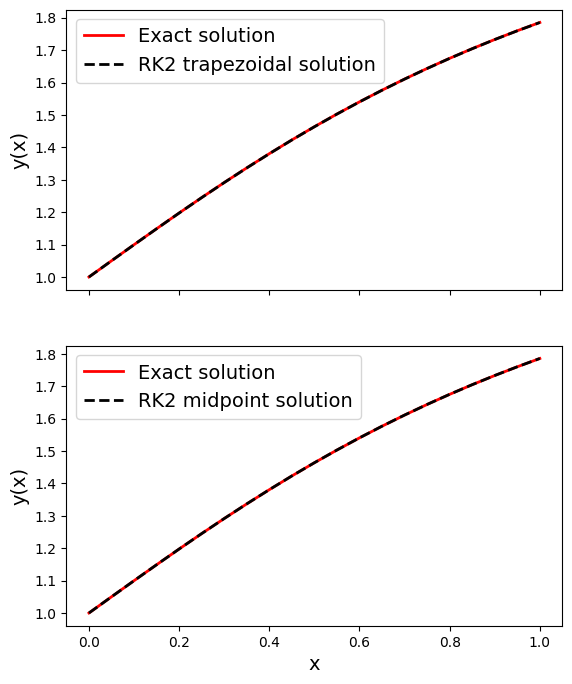

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x0, y0 = 0, 1 #initial conditions
h = 0.05
x_end = 1


#Differential equation
def f(x, y):
    return 1/(1 + x*x)


#Exact solution
def y_exact(x):
    return 1 + np.arctan(x)


#Constructing the arrays:
x_arr = np.arange(x0, x_end + h, h) #make sure it goes up to and including x_end

y_trapz = np.zeros(x_arr.shape) #trapezoidal rule solution
y_trapz[0] = y0

y_mid = np.zeros(x_arr.shape) #midpoint rule solution
y_mid[0] = y0


#Runge-Kutta method
for i,x in enumerate(x_arr[:-1]):
    #Trapezoidal update step
    f_trapz = f(x, y_trapz[i])
    y_trapz[i + 1] = y_trapz[i] + 0.5 * h * ( f_trapz + f(x + h, y_trapz[i] + h * f_trapz) )
    
    #Midpoint update step
    y_mid[i + 1] = y_mid[i] + h * f(x + 0.5 * h, y_mid[i] + 0.5 * h * f(x, y_mid[i]))


#Plotting the solutions
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (6.4, 8))

##Plotting trapezoidal
ax[0].plot(x_arr, y_exact(x_arr), color = 'red', label = 'Exact solution', linewidth = 2)
ax[0].plot(x_arr, y_trapz, '--k', label = 'RK2 trapezoidal solution', linewidth = 2)
ax[0].set_ylabel('y(x)', fontsize = 14)
ax[0].legend(fontsize = 14)

##Plotting midpoint
ax[1].plot(x_arr, y_exact(x_arr), color = 'red', label = 'Exact solution', linewidth = 2)
ax[1].plot(x_arr, y_mid, '--k', label = 'RK2 midpoint solution', linewidth = 2)
ax[1].set_ylabel('y(x)', fontsize = 14)
ax[1].set_xlabel('x', fontsize = 14)
ax[1].legend(fontsize = 14)

plt.show()

</div>

## Fourth Order Runge-Kutta (RK4)

As mentioned, the more popular Runge-Kutta method is the fourth order (for which we will not cover the derivation):

$$
y_{i+1} = y_i + \tfrac{1}{6} h~ (k_1 + 2 k_2 + 2 k_3 + k_4)
$$

where the $k$ values are the slopes:

\begin{align*}
k_1 &= f(x_i, y_i)\\
k_2 &= f\left(x_i + \tfrac{1}{2}h, y_i + \tfrac{1}{2} h ~ k_1 \right)\\
k_3 &= f\left(x_i + \tfrac{1}{2}h, y_i + \tfrac{1}{2} h ~ k_2\right)\\
k_4 &= f(x_i + h, y_i + h ~ k_3)
\end{align*}

$k_1$ is gradient value at the left of the interval. $k_2$ is the gradient at the midpoint of the interval, approximated using $k_1$. The $k_3$ value is the gradient at the midpoint of the interval using $k_2$ to approximate it. $k_4$ is the value of the gradient at the right end of the interval using $k_3$ to approximate it.

<!--- Give interpretation for the the different k terms --->

This method has an accumulated error of $O(h^4)$

<div class="worked-example">
    <h5 class="worked-example-title"><b>Worked Example</b></h5>

Again, consider the ordinary differential equation:

$$
\frac{d y}{dx} = \frac{1}{1 + x^2}
$$

with initial conditions $y = 1$ at $x = 0$,
and the exact solution:

$$
y = 1 + \arctan(x)
$$

which we can compare our results to. Let's solve this ODE up to $x = 1$ using the RK4 method.

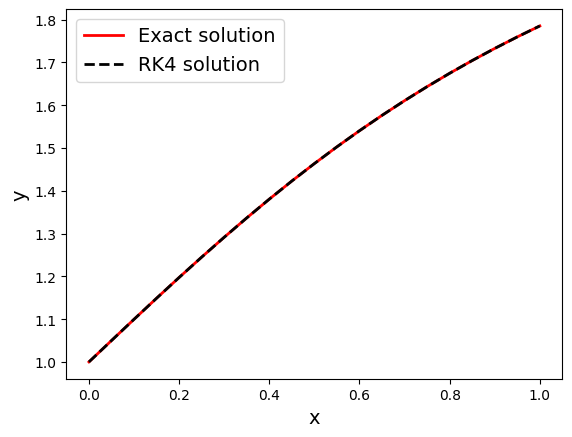

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x0, y0 = 0, 1 #initial conditions
h = 0.05
x_end = 1

#Differential equation
def f(x, y):
    return 1/(1 + x*x)


#Exact solution
def y_exact(x):
    return 1 + np.arctan(x)


#Constructing the arrays:
x_arr = np.arange(x0, x_end + h, h)

y_arr = np.zeros(x_arr.shape)
y_arr[0] = y0


#Runge-Kutta method
for i,x in enumerate(x_arr[:-1]):
    #k values
    k1 = f(x, y_arr[i])
    k2 = f(x + 0.5*h, y_arr[i] + 0.5*h*k1)
    k3 = f(x + 0.5*h, y_arr[i] + 0.5*h*k2)
    k4 = f(x + h, y_arr[i] + h*k3)
    
    #update
    y_arr[i+1] = y_arr[i] + h * (k1 + 2*k2 + 2*k3 + k4) / 6.0
    

#Plotting the solution
fig, ax = plt.subplots()

ax.plot(x_arr, y_exact(x_arr), color = 'red', label = 'Exact solution', linewidth = 2)
ax.plot(x_arr, y_arr, '--k', label = 'RK4 solution', linewidth = 2)
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)

ax.legend(fontsize = 14)

plt.show()

</div>

### Coupled and Higher Order ODEs

As we have discussed in a previous page, higher order ODEs can be reduced to a collection of coupled first order ODEs, for example:

\begin{align}
\frac{d y_1}{dx} &= f_1(x, y_1, y_2, \dots, y_m)\\
\frac{d y_2}{dx} &= f_2(x, y_1, y_2, \dots, y_m)\\
                 &\vdots \\
\frac{d y_m}{dx} &= f_m(x, y_1, y_2 \dots, y_m)
\end{align}

As we have seen, the Euler's method solution for this is fairly simple. For the RK4 method, things are slightly more complicated. We must decide how to calculate the $k$ values.

For the step from $x_n$ to $x_{n+1}$:

$$
y_{j\ n+1} = y_{j\ n} + \tfrac{h}{6} (k_{1\ j} + 2 k_{2\ j} + 2 k_{3\ j} + k_{4\ j} )
$$


Note that the $y_j$ variables are not explicitly dependent on each other, but on the independent variable $x$. Thus we do not have free choice over which $y_j$ values to use when examining another for a particular value of $x$. For any change in $x$, we expect simultaneous change in all of the $y_j$. For this reason, when calculating the $k_j$ values for a particular $y_j$, we need to consider the changes in the other $y_l$.

$$
\begin{array}{l l l l l l l}
k_{1\ j} &= f_j (x_n, &y_{1\ n}~, &\dots, &y_{j\ n}~, &\dots, &~y_{n-1\ n}~)\\
k_{2, j} &= f_j \big(x_n + \tfrac{1}{2}h, &y_{1\ n}~ + \tfrac{1}{2} k_{1\ 0}~, &\dots, &y_{j\ n}~ + \tfrac{1}{2} k_{1\ j}, &\dots, &y_{m, n}~ + \tfrac{1}{2} k_{1, m}~ \big)\\
k_{3, j} &= f_j \big(x_n + \tfrac{1}{2}h, &y_{1\ n}~ + \tfrac{1}{2} k_{2\ 0}~, &\dots, &y_{j\ n}~ + \tfrac{1}{2} k_{2\ j}, &\dots, &y_{m\ n}~ + \tfrac{1}{2} k_{2\ m}~\big)\\
k_{4, j} &= f_j ( x_n + h, &y_{1\ n}~ + k_{3, 1}~, &\dots, &y_{j\ n}~ + k_{3\ j}, &\dots, &y_{m\ n}~ + k_{3\ m} )\\
\end{array}
$$

This looks more complicated then it is to apply in practice. All we need to do is vectorize the solution, as in the previous section. We can represent all the $y_j$ as a vector:

$$
\vec{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_m \end{pmatrix}
$$

the ODE can thus be represented as:

$$
\frac{d \vec{y}}{dx} = \vec{f}(x, \vec{y}) = \begin{pmatrix} f_1 (x, \vec{y}) \\ f_2 (x, \vec{y}) \\ \vdots \\ f_m (x, \vec{y}) \end{pmatrix}
$$

and an update step as:

$$
\vec{y}_{n+1} = \vec{y}_n + \tfrac{1}{6} h (\vec{k_1} + 2 \vec{k_2} + 2 \vec{k_3} + \vec{k_4})
$$

where:

$$
\vec{k_i} = \begin{pmatrix} k_{i, 1} \\ k_{i, 2} \\ \vdots \\ k_{i, m} \end{pmatrix}
$$

Note that we can write:

$$
\begin{pmatrix}
y_{1, n}~ + \tfrac{1}{2} h k_{1, 1} \\\vdots \\y_{j, n}~ + \tfrac{1}{2} h k_{1, j} \\ \dots \\ y_{m, n}~ + \tfrac{1}{2} h k_{1, m}
\end{pmatrix}
= \vec{y}_n + \tfrac{1}{2} h \vec{k1}
$$

with this in mind, we can simply write the $k$ values as:

\begin{align*}
\vec{k_1} &= \vec{f}(x_n,\ \vec{y}_n)\\
\vec{k_2} &= \vec{f}\left(x_n + \tfrac{1}{2} h,\ \vec{y}_n + \tfrac{1}{2} h ~ \vec{k_1} \right)\\
\vec{k_3} &= \vec{f}\left(x_n + \tfrac{1}{2} h,\ \vec{y}_n + \tfrac{1}{2} h ~ \vec{k_2} \right)\\
\vec{k_4} & = \vec{f}\left(x_n + h,\ \vec{y}_n + h ~ \vec{k_3} \right)
\end{align*}

<div class="worked-example">
    <h5 class="worked-example-title"><b>Worked Example</b></h5>

Consider the third order differential equation:

$$
\frac{d^{4}y}{dx^4} = -12 x y - 4 x^2 \frac{d y}{dx}
$$

with the initial conditions: $y(x = 0) = 0$, $y^\prime(0) = 0$ and $y^{\prime\prime}(0) = 2$.

This has an exact solution of:

$$
y(x) = e^{-x^2}
$$

which we shall use to test our numerical result.

We shall solve this up to $x = 5$ with steps of size $h = 0.1$.

First we reduce this to a system of first order equations by introducing the variables $y_0(x) = y(x)$, $y_1(x) = y^\prime(x)$ and $y_2(x) = y^{\prime\prime}(x)$:

\begin{align*}
\frac{d y_1}{dx} &= y_2\\
\frac{d y_2}{dx} &= y_3\\
\frac{d y_3}{dx} &= -12 x y_1 - 4 x^2 y_2
\end{align*}

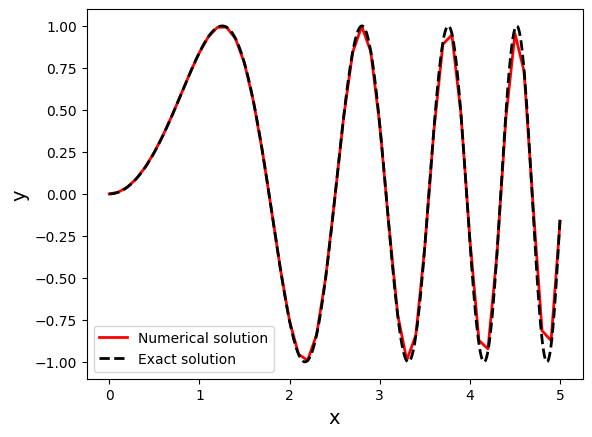

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 0  #initial conditions
y0 = np.array([0, 0, 2]) #initial conditions
h = 0.1
x_end = 5

def f(x, y):
    return np.array([
        y[1],
        y[2],
        -12*x*y[0] - 4*x*x*y[1]
    ])

def y_exact(x):
    return np.sin(x*x)

#Constructing the arrays:
x_arr = np.arange(x0, x_end + h, h)

y_arr = np.zeros((x_arr.size, len(y0)))
y_arr[0, :] = y0

#Runge-Kutta method
for i,x in enumerate(x_arr[:-1]):
    y = y_arr[i,:]
    
    #k values
    k1 = f(x, y)
    k2 = f(x + 0.5*h, y + 0.5*h*k1)
    k3 = f(x + 0.5*h, y + 0.5*h*k2)
    k4 = f(x + h, y + h * k3)
    
    #update
    y_arr[i+1, :] = y + h * (k1 + 2*k2 + 2*k3 + k4) / 6.0
    

#Plotting the solution
fig, ax = plt.subplots()

ax.plot(x_arr, y_arr[:, 0], color = 'red', linewidth = 2, label = 'Numerical solution')

x_exact = np.linspace(x_arr[0], x_arr[-1], 1000) #x_arr is too sparse to properly plot the curve
ax.plot(x_exact, y_exact(x_exact), 'k--', linewidth = 2, label = 'Exact solution')

ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)

ax.legend()

plt.show()

</div>

## References
```{bibliography} ../../../_bibliography/references.bib
:cited:
:style: plain
:labelprefix: RK
:keyprefix: nm-ode-rk-
```